<h4>ChatGPT Internal Source Consistency Analysis</h4>
<p>
This notebook evaluates ChatGPT’s internal consistency in source citation behavior. Each query was executed three independent times using the ChatGPT web interface. Each query thus contributes three independent source lists.
</p>

In [1]:
import pandas as pd
import numpy as np

import sys, os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..", "..", "src")))
from data import get_chatgpt_df
from metrics import syntactic_overlap
from plots import boxplot

<h4>Dataset: ChatGPT</h4>

In [2]:
chatgpt_df = get_chatgpt_df()
chatgpt_df

,query,product,market_type,query_level,response_text,sources_cited,sources_additional,recommended_products
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,[There’s no one “best” smartphone that’s perfe...,[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.tomsguide.com/phones/android-pho...,"[[Apple iPhone 17 Pro Max, Samsung Galaxy S25 ..."
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,"[There’s no one “best” smartphone under $1,000...",[[https://www.tomsguide.com/best-picks/best-ph...,[[https://www.androidcentral.com/best-android-...,"[[Samsung Galaxy S25, Samsung Galaxy S25+, App..."
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,"[There’s no one-size-fits-all “best” phone, be...",[[https://www.techradar.com/news/best-cameraph...,[[https://coffeechoice.org/en/best-smartphones...,"[[Apple iPhone 16 Pro, Samsung Galaxy S25 Ultr..."
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,[That’s a great question — the “best” depends ...,[[https://www.androidcentral.com/phones/oneplu...,[[https://www.techadvisor.com/article/723383/b...,"[[OnePlus 13, Samsung Galaxy S25, Google Pixel..."
4,What is the best laptop?,Laptop,Commodity / Saturated,General,[There’s no one-size-fits-all “best laptop” — ...,[[https://www.pcworld.com/article/436674/best-...,[[https://www.bleepingcomputer.com/forums/t/81...,"[[Lenovo Yoga 9i 2-in-1 Aura Edition, Lenovo T..."
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,[There’s no one-size-fits-all “best” laptop un...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,"[[HP Victus 16, Asus Zenbook S 16, MacBook Air..."
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,[“Best” depends a lot on what you plan to use ...,[[https://www.tomshardware.com/best-picks/best...,[[https://www.laptopmag.com/articles/best-lapt...,"[[HP Victus 16, Apple MacBook Air 15″ (M4), HP..."
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,[“Best” always depends a bit on what you value...,[[https://www.ultrabookreview.com/2071-best-ga...,[[https://www.pcworld.com/article/436674/best-...,"[[ASUS TUF Gaming A14, ASUS Vivobook S14 OLED,..."
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,[There is no one-size-fits-all answer to “the ...,[[https://www.techradar.com/news/wearables/bes...,[[https://www.techadvisor.com/article/723389/b...,"[[Apple Watch Ultra 2, Apple Watch Series 10, ..."
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,[“Best” depends on what matters most to you (f...,[[https://www.techradar.com/news/wearables/bes...,"[[https://www.youtube.com/watch?v=3xgvATlp6fs,...","[[Apple Watch Ultra 2, Samsung Galaxy Watch 8,..."


<h4>Mean Internal Source Overlap - Implementation & Calculation</h4> 
<p>
To quantify the consistency of ChatGPT’s information sourcing, we compute the Mean Internal Source Overlap (MISO) for each query. 
MISO measures the <em>average syntactic overlap</em> among all pairs of source lists gathered across multiple independent runs of the same query.
</p> 

<p>
Formally, let \( C = \{(i, j) \mid 1 \le i < j \le |S_{GPT_q}|\} \) denote the set of all unique pairs of source lists for query \( q \), such that \( |C| = \binom{|S_{GPT_q}|}{2} \). 
Then, the Mean Internal Source Overlap is defined as:
</p> 

<p style="text-align:center;"> 
\( MISO(q) = \frac{1}{|C|} \sum_{(i, j) \in C} O_{\text{syntactic}}(s_{qi}, s_{qj}) \) 
</p> 

<p>
where \( O_{\text{syntactic}}(s_{qi}, s_{qj}) \) represents the syntactic overlap between the two source lists \( s_{qi} \) and \( s_{qj} \), 
computed using the Szymkiewicz–Simpson coefficient. This coefficient captures the proportion of shared sources relative to the smaller of the two lists, making it robust to list length differences. Higher MISO values indicate greater internal consistency in ChatGPT’s source selection, reflecting stable retrieval behavior across independent runs of the same query.
</p>

In [6]:
def calc_miso(chatgpt_df, chatgpt_sources):
    from itertools import combinations
    
    mipo_results = []

    for _, row in chatgpt_df.iterrows():
        row_list = row[chatgpt_sources]
        pairwise_scores = []

        for c in combinations(row_list, 2):
            score = syntactic_overlap(c[0], c[1])
            pairwise_scores.append(score)

        syntactic_mean = np.mean(pairwise_scores)
        syntactic_var = np.var(pairwise_scores, ddof = 0)
        syntactic_std = np.sqrt(syntactic_var)

        mipo_results.append({
            "query": row["query"],
            "product": row["product"],
            "market_type": row["market_type"],
            "query_level": row["query_level"],
            "miso_mean": syntactic_mean,
            "miso_var": syntactic_var,
            "miso_std": syntactic_std
        })

    return pd.DataFrame(mipo_results)

In [7]:
miso_df = calc_miso(chatgpt_df, chatgpt_sources = "sources_cited")
miso_df

,query,product,market_type,query_level,miso_mean,miso_var,miso_std
0,What is the best smartphone?,Smartphone,Commodity / Saturated,General,1.000000,0.000000,0.000000
1,What is the best smartphone under 1000 dollars?,Smartphone,Commodity / Saturated,General & Price,0.250000,0.125000,0.353553
2,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature,0.333333,0.222222,0.471405
3,What is the best smartphone under 1000 dollars...,Smartphone,Commodity / Saturated,General & Price & Feature & Feature,0.000000,0.000000,0.000000
4,What is the best laptop?,Laptop,Commodity / Saturated,General,0.666667,0.000000,0.000000
5,What is the best laptop under 1500 dollars?,Laptop,Commodity / Saturated,General & Price,0.500000,0.000000,0.000000
6,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature,0.833333,0.055556,0.235702
7,What is the best laptop under 1500 dollars wit...,Laptop,Commodity / Saturated,General & Price & Feature & Feature,0.166667,0.055556,0.235702
8,What is the best smartwatch?,Smartwatch,Commodity / Saturated,General,0.666667,0.013889,0.117851
9,What is the best smartwatch under 800 dollars?,Smartwatch,Commodity / Saturated,General & Price,1.000000,0.000000,0.000000


<h4>Mean Internal Source Overlap - Analysis (Sources Cited in Response)</h4>

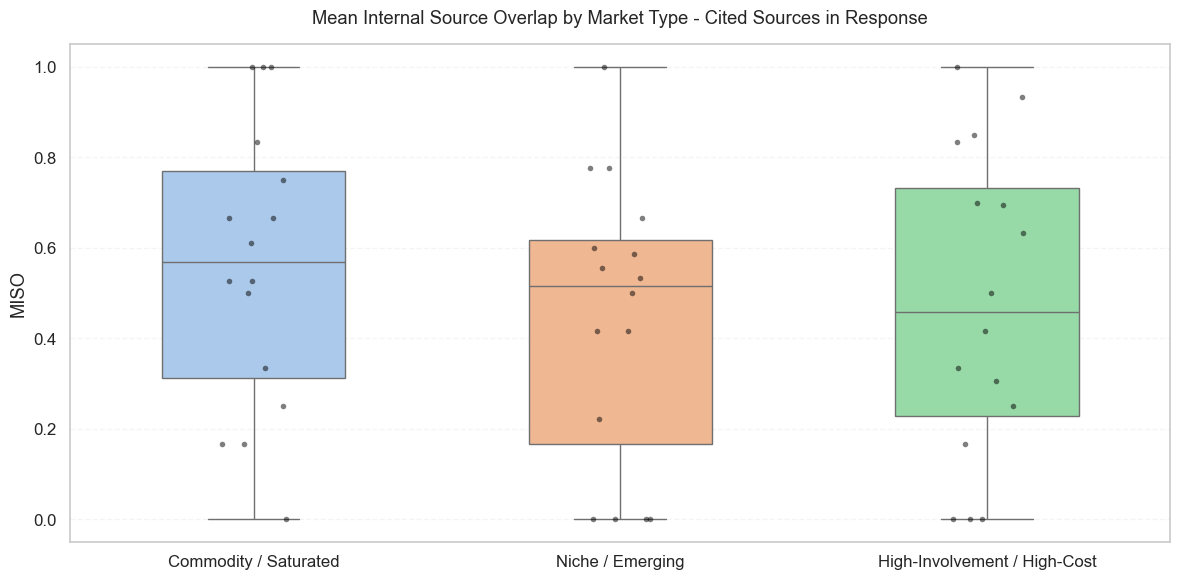

In [8]:
miso_cs = miso_df[miso_df["market_type"] == "Commodity / Saturated"]
miso_ne = miso_df[miso_df["market_type"] == "Niche / Emerging"]
miso_hh = miso_df[miso_df["market_type"] == "High-Involvement / High-Cost"]

plot_df = pd.DataFrame({
    "MISO": pd.concat([
        miso_cs["miso_mean"],
        miso_ne["miso_mean"],
        miso_hh["miso_mean"],
    ], ignore_index = True),
    "Market Type": (
        ["Commodity / Saturated"] * len(miso_cs)
        + ["Niche / Emerging"] * len(miso_ne)
        + ["High-Involvement / High-Cost"] * len(miso_hh)
    )
})

fix, ax = boxplot(
    df = plot_df,
    x_col = "Market Type",
    y_col = "MISO",
    order = ["Commodity / Saturated", "Niche / Emerging", "High-Involvement / High-Cost"],
    title = "Mean Internal Source Overlap by Market Type - Cited Sources in Response",
    xlabel = "",
    ylabel = "MISO"
)

<h4>Interpretation of MISO by Market Type</h4> 
<p>This boxplot shows the Mean Internal Source Overlap (MISO) across three market categories: Commodity / Saturated, Niche / Emerging, and High-Involvement / High-Cost. </p> 
<h5>Commodity / Saturated</h5> 
<ul> 
    <li>Highest median MISO with a moderate spread, suggesting strong consistency in cited sources.</li> 
    <li>In these well-established markets, ChatGPT tends to rely on abundant and standardized references, reinforcing stable retrieval behavior.</li> </ul> 
<h5>Niche / Emerging</h5> 
<ul> 
    <li>Moderate median MISO with wider variability.</li> 
    <li>Source overlap is less consistent due to limited authoritative content and evolving terminology in newer markets.</li> 
    <li>Retrieval patterns are more sensitive to subtle changes in query phrasing or context.</li> 
</ul> 
<h5>High-Involvement / High-Cost</h5> 
<ul> 
    <li>Slightly lower median MISO and broad spread across samples.</li> 
    <li>These markets involve complex, multifaceted information needs, leading ChatGPT to draw from a broader mix of sources.</li> 
    <li>Lower overlap reflects adaptive retrieval driven by context-heavy and subjective factors.</li> 
</ul> 
<p>Overall, ChatGPT’s internal citation consistency is strongest in structured, data-rich markets and weakest in complex, context-dependent ones. As market complexity increases, MISO declines—signaling a shift from stable retrieval toward more adaptive and variable sourcing behavior.</p>

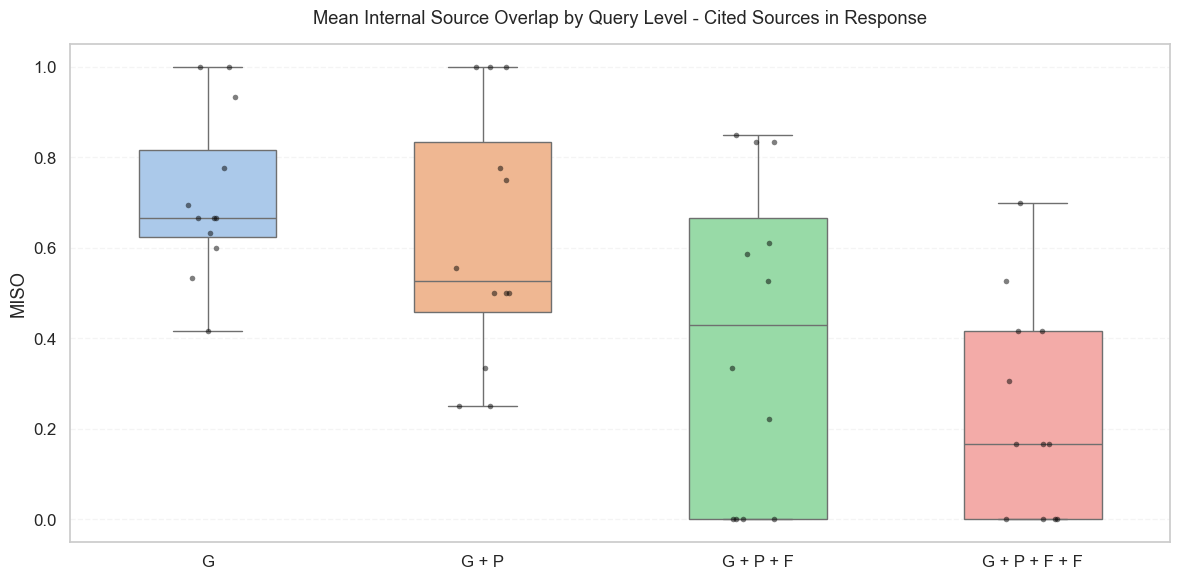

In [9]:
miso_g = miso_df[miso_df["query_level"] == "General"]
miso_gp = miso_df[miso_df["query_level"] == "General & Price"]
miso_gpf = miso_df[miso_df["query_level"] == "General & Price & Feature"]
miso_gpff = miso_df[miso_df["query_level"] == "General & Price & Feature & Feature"]

plot_df = pd.DataFrame({
    "MISO": pd.concat([
        miso_g["miso_mean"],
        miso_gp["miso_mean"],
        miso_gpf["miso_mean"],
        miso_gpff["miso_mean"]
    ], ignore_index=True),
    "Query Level": (
        ["G"] * len(miso_g)
        + ["G + P"] * len(miso_gp)
        + ["G + P + F"] * len(miso_gpf)
        + ["G + P + F + F"] * len(miso_gpff)
    )
})

fix, ax = boxplot(
    df = plot_df,
    x_col = "Query Level",
    y_col = "MISO",
    order = ["G", "G + P", "G + P + F", "G + P + F + F"],
    title = "Mean Internal Source Overlap by Query Level - Cited Sources in Response",
    xlabel = "",
    ylabel = "MISO"
)

<h4>Interpretation of MISO by Query Level</h4> 
<p>This boxplot shows how the Mean Internal Source Overlap (MISO) changes with increasing query specificity: General (G), General + Price (G + P), General + Price + Feature (G + P + F), and General + Price + Feature + Feature (G + P + F + F). Each additional constraint tests ChatGPT’s ability to maintain consistency in the sources it cites as queries become more detailed and restrictive.</p> 
<h5>G (General)</h5> 
<ul> 
    <li>Highest median MISO with minimal variance, indicating strong stability in cited sources.</li> 
    <li>Open-ended prompts yield consistent retrieval patterns as ChatGPT repeatedly draws from a similar set of broad, authoritative references.</li> </ul> 
<h5>G + P (General + Price)</h5> 
<ul> 
    <li>Moderate median MISO with slightly increased spread.</li> 
    <li>Introducing a price constraint adds a filtering layer, slightly diversifying the sources referenced across runs.</li> 
</ul> 
<h5>G + P + F (General + Price + Feature)</h5> 
<ul> 
    <li>Lower median MISO and larger variability.</li> 
    <li>Feature-level filtering narrows the relevant source pool, increasing the model’s sensitivity to query nuance and context shifts.</li> 
</ul> 
<h5>G + P + F + F (General + Price + Two Features)</h5> 
<ul> 
    <li>Lowest median MISO and widest spread, reflecting high variability in source citation.</li> 
    <li>As constraints multiply, retrieval becomes more context-specific and less repetitive, leading to reduced source overlap across runs.</li> </ul> 
<p>Overall, MISO decreases as query complexity increases. ChatGPT exhibits consistent citation behavior for general queries but becomes more adaptive and exploratory when handling detailed, multi-constraint requests. This trend suggests a shift from stable retrieval toward more context-sensitive and dynamic sourcing as query specificity rises.</p>